# Run FindAllMarkers on bcd-RNAi data

In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(MAST)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
seu_HQC <- readRDS(file = "../../data/seurat_object/bcdRNAi/seu_HQC_subclustered2_bcdRNAi.obj")
seu_HQC

An object of class Seurat 
28533 features across 6168 samples within 2 assays 
Active assay: SCT (11029 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, tsne, reumap

In [3]:
levels <- read.table(file="./manual_ID_levels_color_bcdRNAi.txt", comment.char = '')
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)

[1] "ectoderm_medial_DE_abdominal"       "ectoderm_intermediate_DE_abdominal"
[3] "ectoderm_lateral_DE_abdominal"      "ectoderm_lateral_NE_abdominal"     
[5] "ectoderm_intermediate_NE_abdominal" "ectoderm_medial_NE_abdominal"

[1] 24

[1] "darkolivegreen1" "darkolivegreen2" "olivedrab1"      "olivedrab2"     
[5] "olivedrab3"      "olivedrab4"

In [4]:
annot_df <- read.csv('./annot_df.csv')
annot_df

X,cluster_id,cluster_name
<int>,<int>,<chr>
1,1,amnioserosa_trunk
2,2,ectoderm_lateral_NE_abdominal
3,3,endoderm_postMG_lateral
4,4,ectoderm_medial_DE_abdominal
5,5,amnioserosa_PS13-14
6,6,mesoderm_abdominal_even
7,7,ectoderm_lateral_DE_abdominal
8,8,mesoderm_PS6
9,9,ectoderm_PS14_ventral


In [5]:
Idents(seu_HQC) <- 'manual_ID'
levels(seu_HQC) <- levels
all.markers <- FindAllMarkers(seu_HQC, method = 'MAST')
head(all.markers)

Calculating cluster ectoderm_medial_DE_abdominal

Calculating cluster ectoderm_intermediate_DE_abdominal

Calculating cluster ectoderm_lateral_DE_abdominal

Calculating cluster ectoderm_lateral_NE_abdominal

Calculating cluster ectoderm_intermediate_NE_abdominal

Calculating cluster ectoderm_medial_NE_abdominal

Calculating cluster midline_cells

Calculating cluster ectoderm_PS14_dorsal

Calculating cluster ectoderm_PS14_ventral

Calculating cluster ectoderm_PS14/hindgut

Calculating cluster amnioserosa_trunk

Calculating cluster amnioserosa_PS13-14

Calculating cluster ectoderm_hindgut_dorsal

Calculating cluster ectoderm_hindgut_ventral

Calculating cluster endoderm_postMG_dorsal

Calculating cluster endoderm_postMG_lateral

Calculating cluster endoderm_postMG_ventral

Calculating cluster mesoderm_PS6

Calculating cluster mesoderm_abdominal_odd

Calculating cluster mesoderm_abdominal_even

Calculating cluster mesoderm_PS13

Calculating cluster mesoderm_PS14

Calculating cluster mesod

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
kay,3.811091e-80,0.8365637,0.885,0.184,4.203252e-76,ectoderm_medial_DE_abdominal,kay
Alk,4.108932e-78,0.9062692,0.903,0.193,4.531741e-74,ectoderm_medial_DE_abdominal,Alk
tup,9.033002e-71,1.2060761,0.991,0.311,9.962498e-67,ectoderm_medial_DE_abdominal,tup
mirr,7.660228e-62,1.4202858,0.991,0.436,8.448466e-58,ectoderm_medial_DE_abdominal,mirr
ush,1.378784e-60,0.9824526,0.973,0.345,1.520661e-56,ectoderm_medial_DE_abdominal,ush
pnr,1.630934e-56,0.7831172,0.920,0.268,1.798757e-52,ectoderm_medial_DE_abdominal,pnr


In [6]:
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

[1] 240

NULL

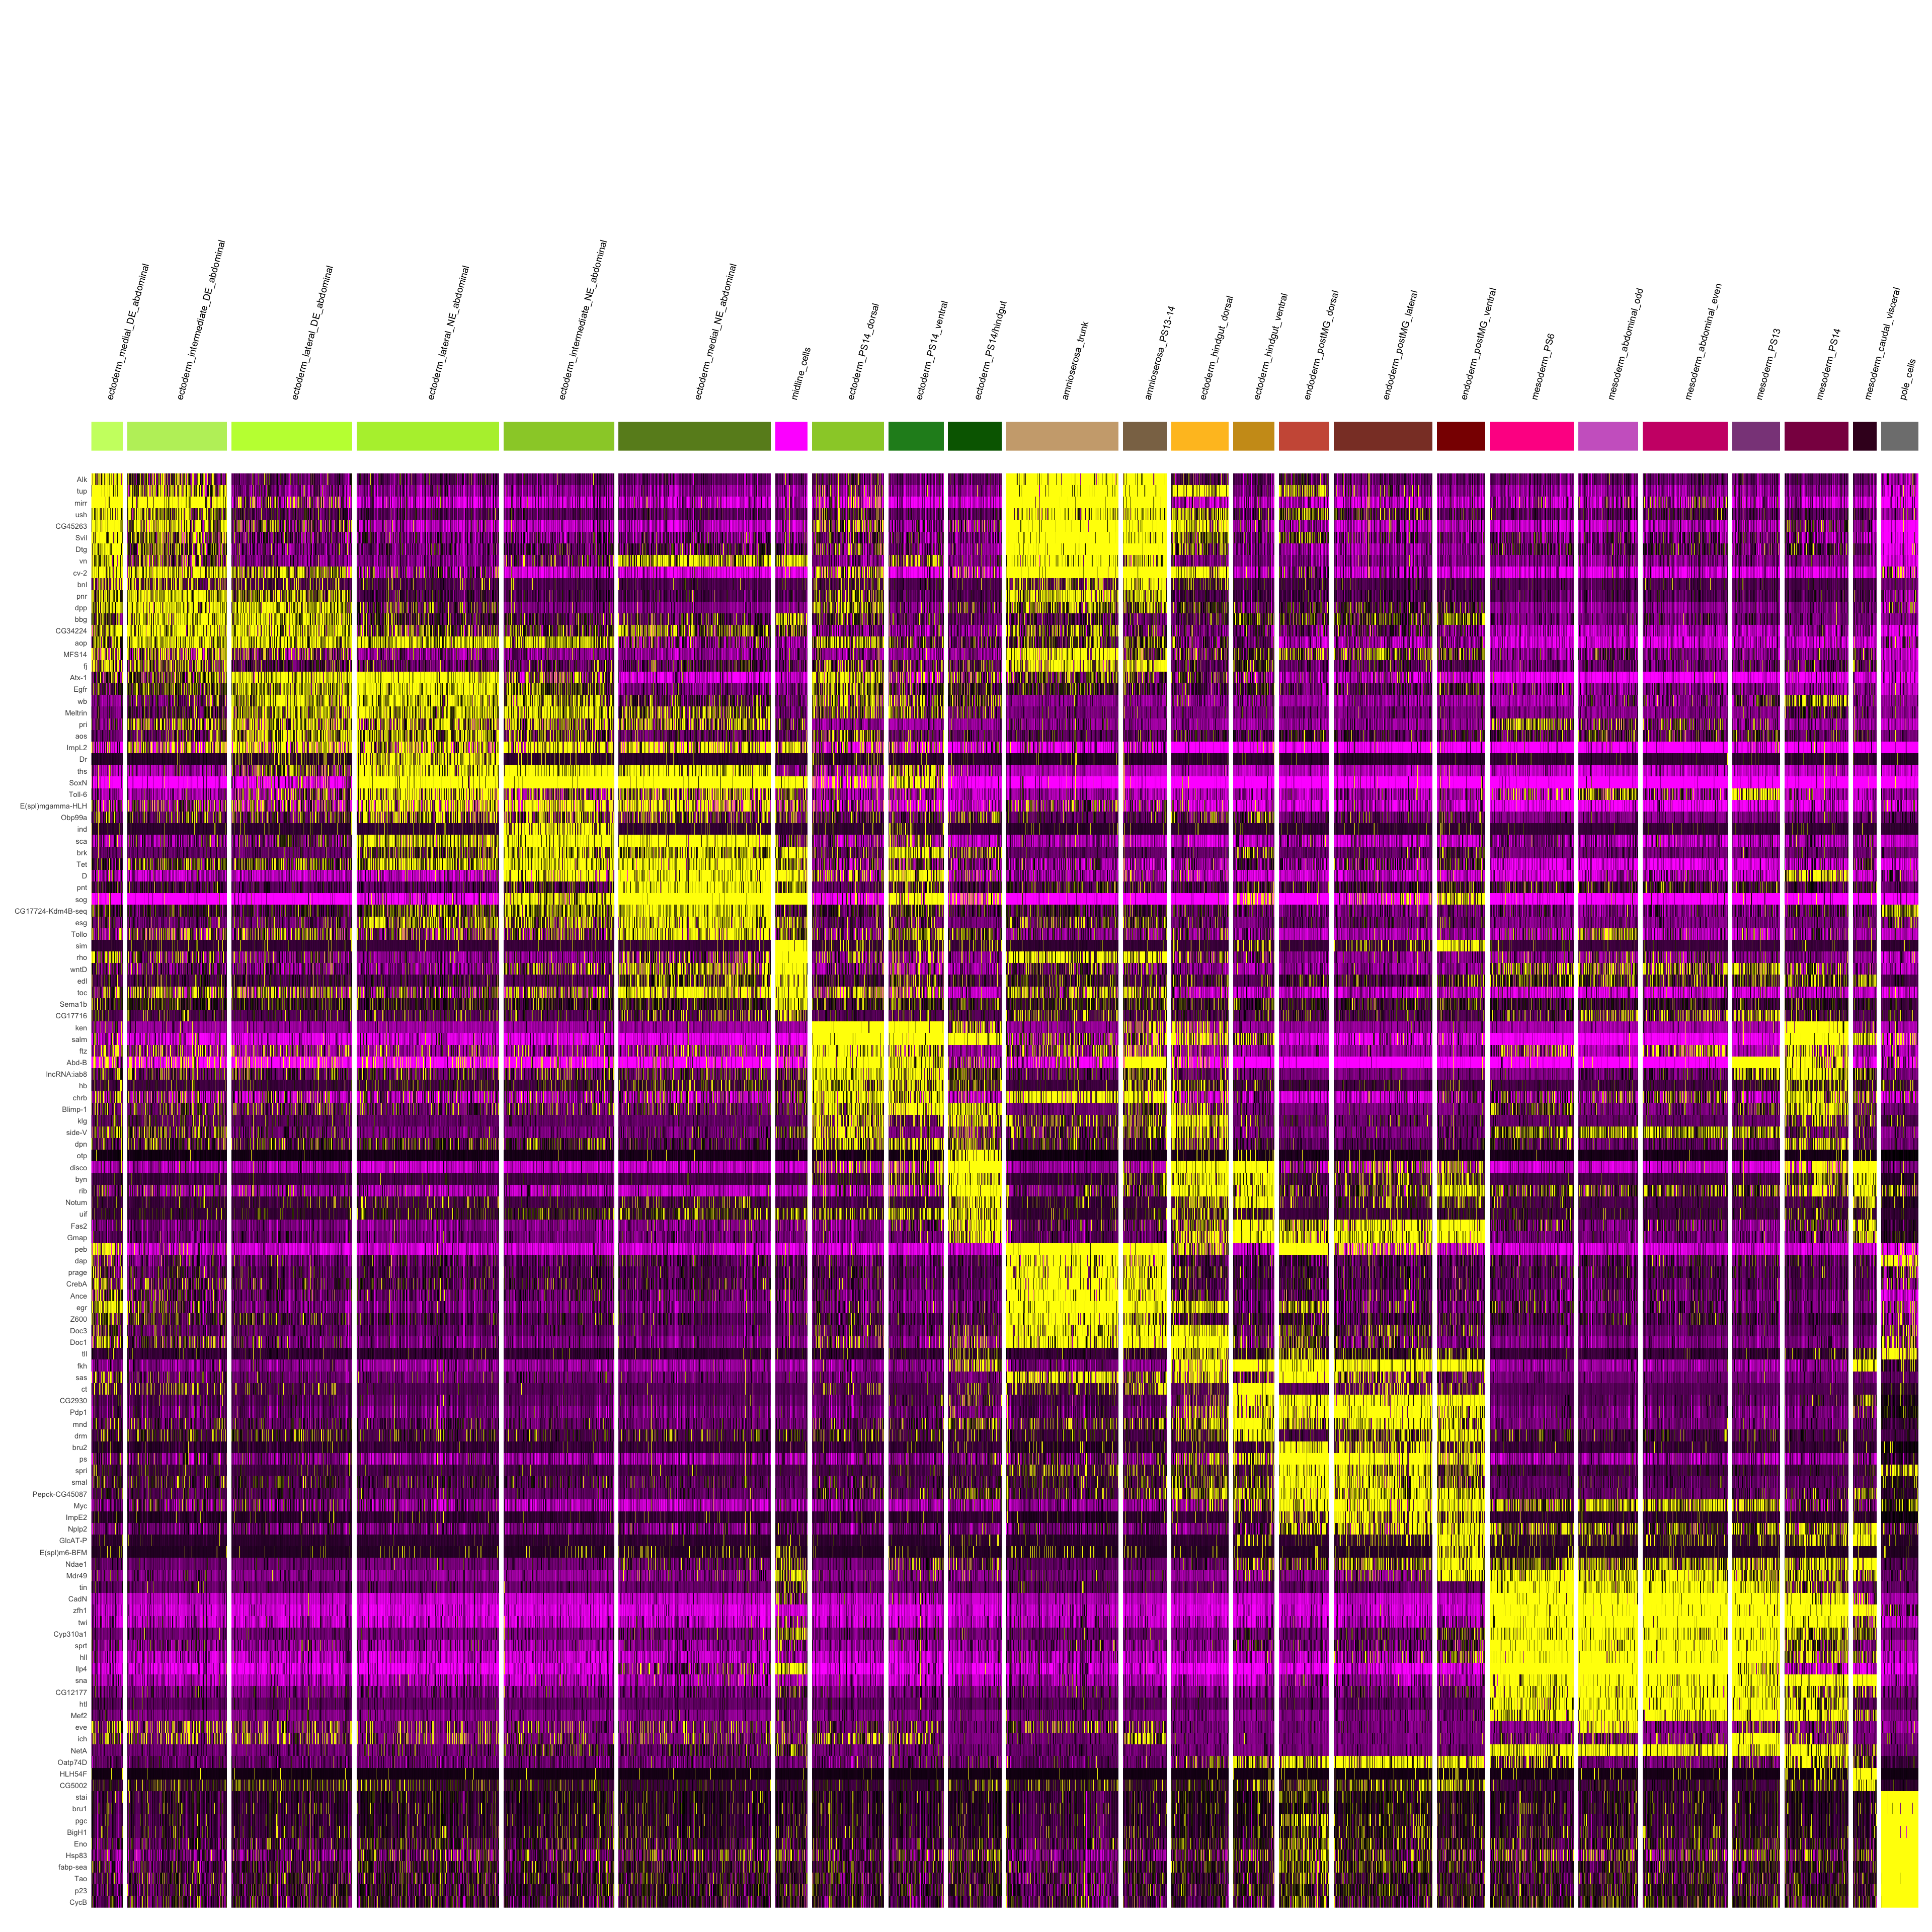

In [7]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4)  + NoLegend() 
ggsave(file = "./figures/08_FindAllMarkers_bcdRNAi/All_cells_heatmap_manual_ID_bcdRNAi.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

NULL

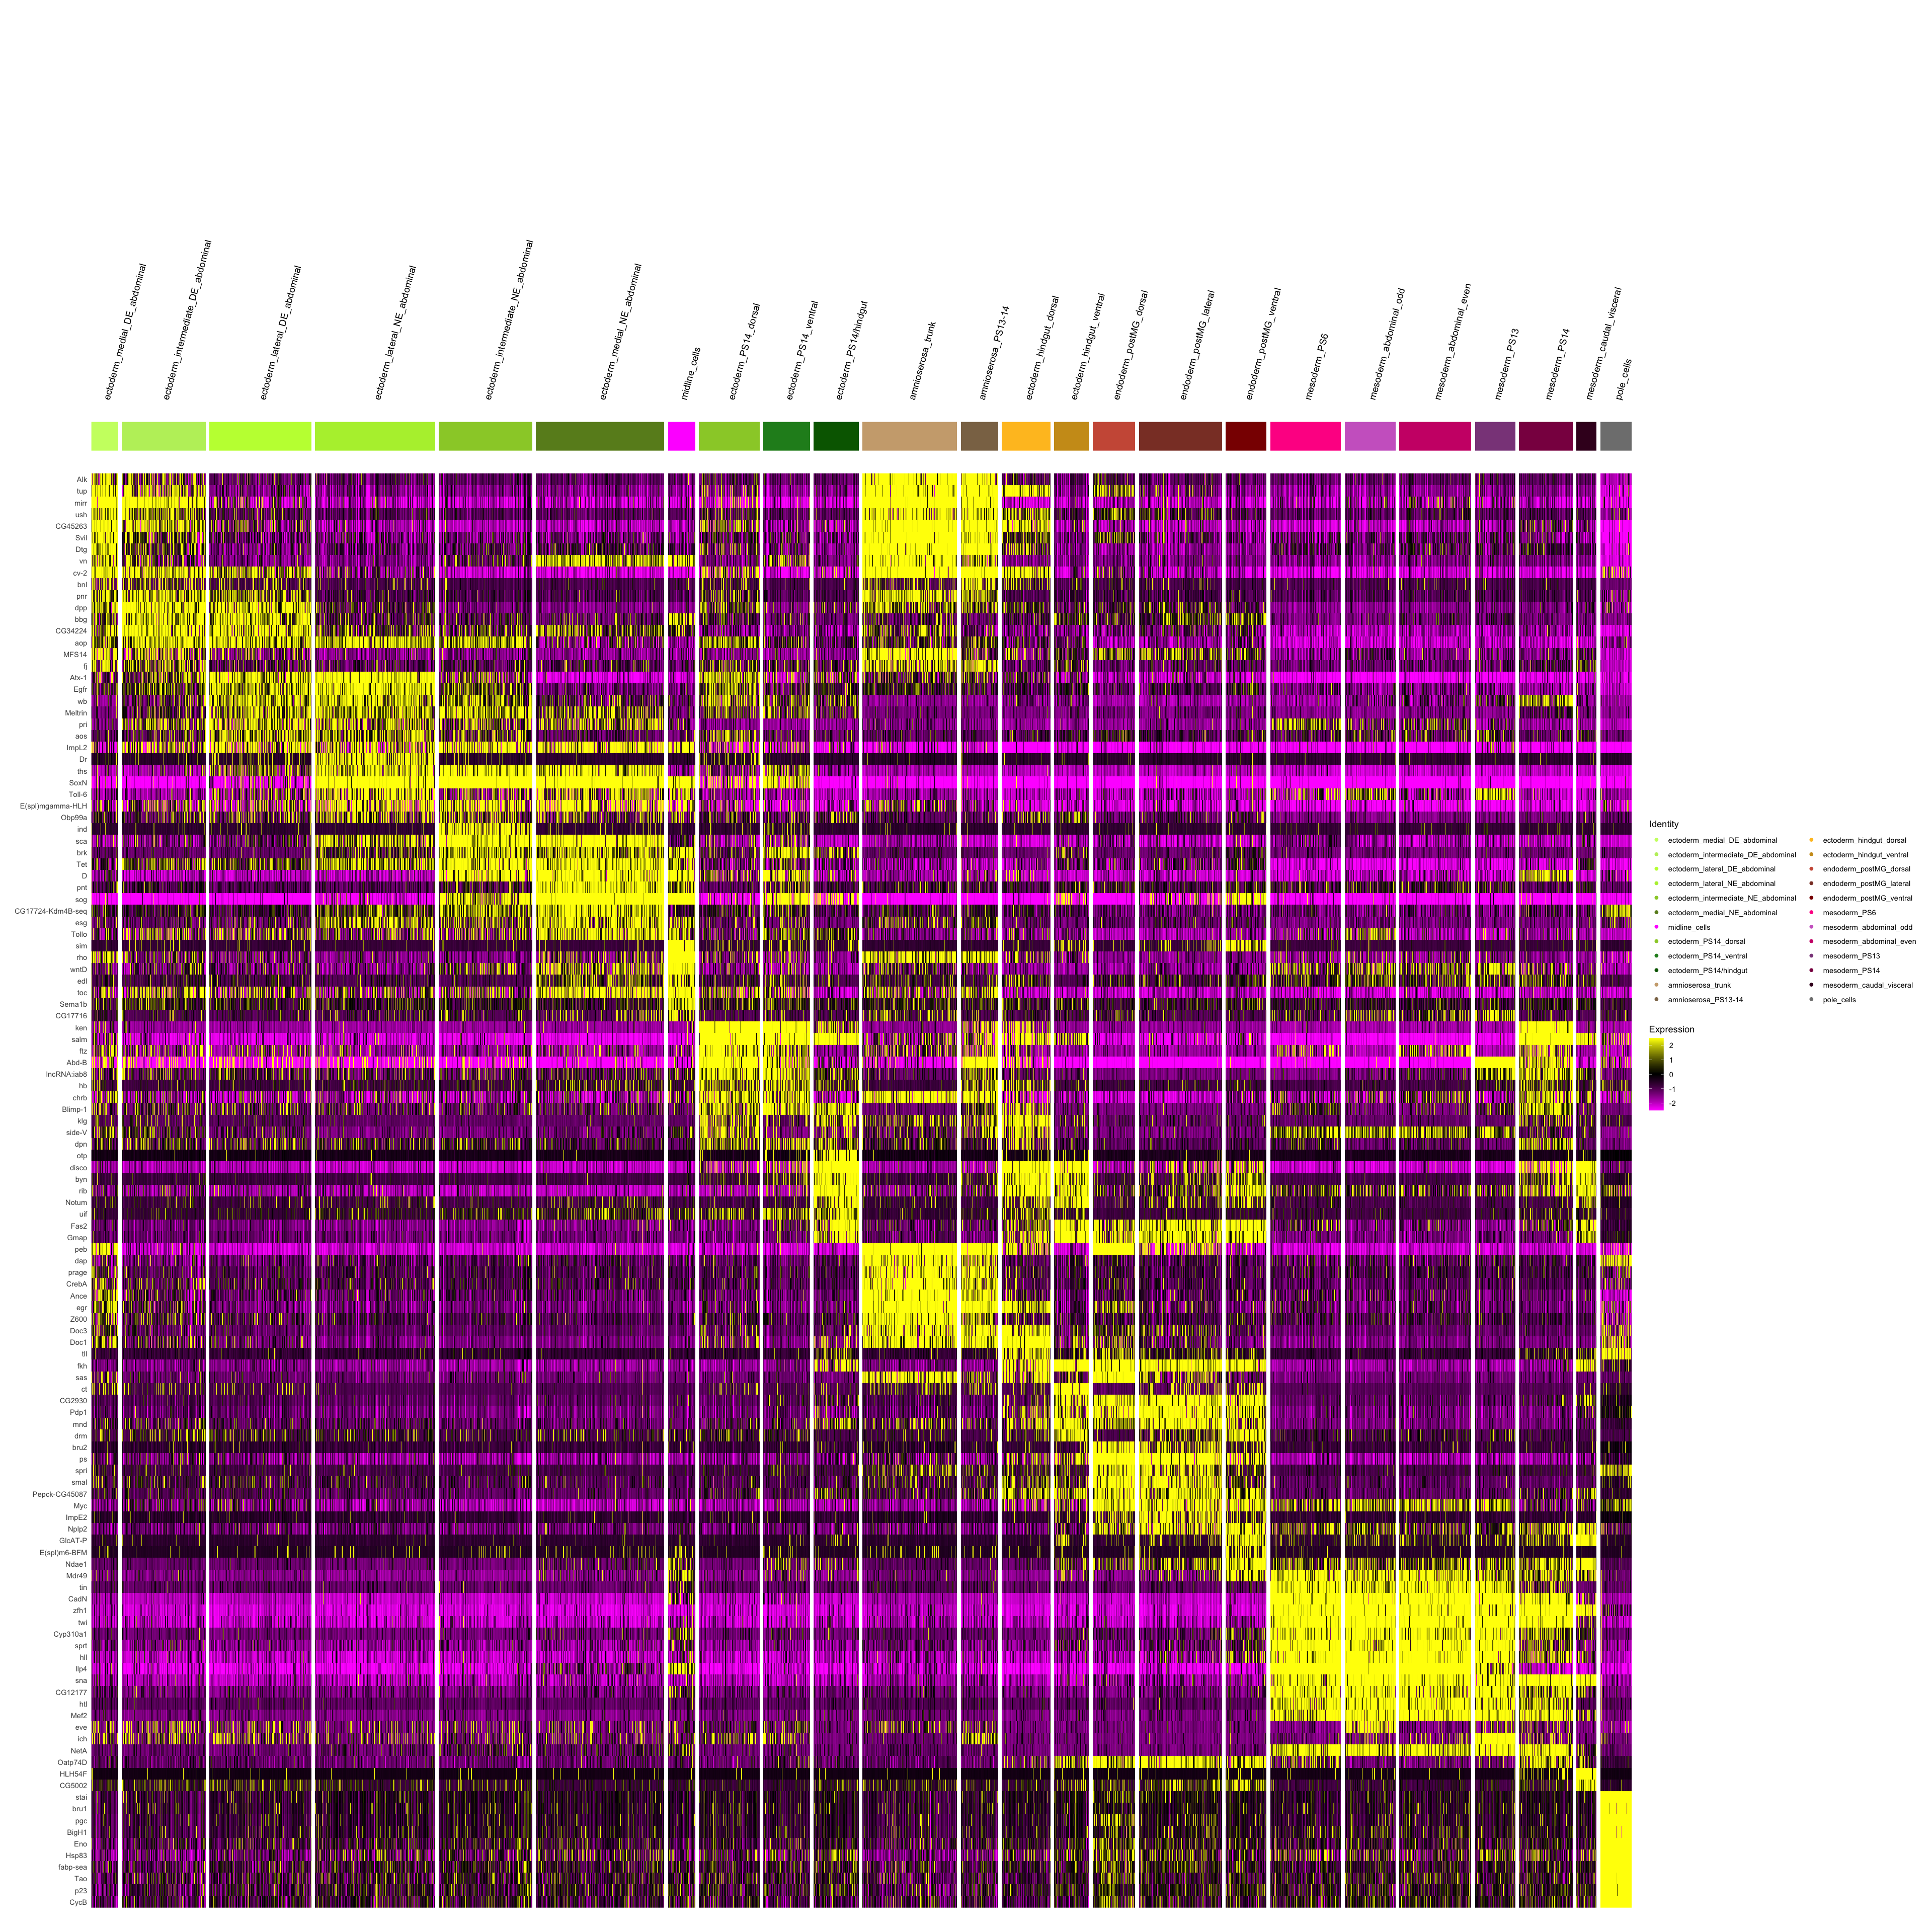

In [8]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4)
ggsave(file = "./figures/08_FindAllMarkers_bcdRNAi/All_cells_heatmap_manual_ID_with_legend_bcdRNAi.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

In [9]:
manual_ID <- all.markers$cluster
unique.manual_ID <- unique(manual_ID)
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
all.markers$cluster_num <- manual_ID_num

In [10]:
write.csv(x = all.markers, file = './all_markers_bcdRNAi.csv')

In [11]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MAST_1.16.0                 SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] GenomicRanges_1.42.0        GenomeInfoDb_1.26.2        
 [7] IRanges_2.24.1              S4Vectors_0.28.1           
 [9] BiocGenerics_0.36.0         MatrixGenerics_1.2.0       
[11] matrixStats_0.57.0          tibble_3.0.5               
[13] dplyr_1.0.3                 Matrix_1.3-2               
[15] data.table_1.13.6           magrittr_2.0.1